In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import os

In [2]:
df = pd.read_csv('athlete_events.csv')

### Section 1 - View of Data

In [3]:
## Check the data shape 
df.shape

(271116, 15)

* 2.7L rows and 15 columns in dataset - Mid size data

In [4]:
### Data snippet 
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


* Check if Age needs to be in float, or int is fine ?
* Games = Year + Season 
* Medal NaN mean no medal, not a missing value 

In [5]:
## Check the datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


* Convert Sex , Season , Medal -> category
* Check city and sport if can be converted to category . 
* Check if age needs to be converted to int. 


In [14]:
## Action from task 3 

## Can we look for unique value, ratio of unique value. ## Value_counts. #nunique

## Q. Function which takes the column name from user and checks if it can be converted to category. If yes, then do the conversion inside function. 
        ### Note Threshold ratio is 5%
    
def check_cat_conversion():
    
    .. 
    return all names of columns which can be converted


print("{}% is the ratio of unique cities".format(round((df['City'].nunique()/df.shape[0])*100,2)))
print("Convert City to category")

0.02% is the ratio of unique cities
Convert City to category


### Section 2 - Stats Descriptors

In [15]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### Section 3 - Data Corrections 
* Outliers
* Missing Data (NA values) 
* Correlations Check 

In [ ]:
### Step 1 - Outliers. 
## -- Figure out atleast 2 methods for this problem statement to deal with outlier. 

In [4]:
### Step 2 - Missing Data
df.isnull().sum()

### Atleast try 3 methods apart from mean, median, mode

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [ ]:
## Step 3 - Correlations check 
## HW --> 3 methods to deal with correlated columns. 

In [5]:
df.corr()

,ID,Age,Height,Weight,Year
ID,1.000000,-0.003631,-0.011141,-0.009176,0.011885
Age,-0.003631,1.000000,0.138246,0.212069,-0.115137
Height,-0.011141,0.138246,1.000000,0.796213,0.047578
Weight,-0.009176,0.212069,0.796213,1.000000,0.019095
Year,0.011885,-0.115137,0.047578,0.019095,1.000000


### Section 4 - Univariate Analysis 

In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
for i in list(df['Team'].unique()):
    print(i)

China
Denmark
Denmark/Sweden
Netherlands
United States
Finland
Norway
Romania
Estonia
France
Taifun
Morocco
Spain
Egypt
Iran
Bulgaria
Italy
Chad
Azerbaijan
Sudan
Russia
Argentina
Cuba
Belarus
Greece
Cameroon
Turkey
Chile
Mexico
Soviet Union
Nicaragua
Hungary
Nigeria
Algeria
Kuwait
Bahrain
Pakistan
Iraq
United Arab Republic
Lebanon
Qatar
Malaysia
Germany
Thessalonki-1
Canada
Ireland
Australia
South Africa
Eritrea
Tanzania
Jordan
Tunisia
Libya
Belgium
Djibouti
Palestine
Comoros
Kazakhstan
Brunei
India
Saudi Arabia
Syria
Maldives
Ethiopia
United Arab Emirates
North Yemen
Indonesia
Philippines
Singapore
Uzbekistan
Kyrgyzstan
Tajikistan
Unified Team
Japan
Japan-1
Congo (Brazzaville)
Switzerland
Brazil
West Germany
East Germany
Monaco
Fornebo
Israel
Vesper Boat Club
Uruguay
Sweden
United States Virgin Islands
Sri Lanka
Armenia
Cote d'Ivoire
Kenya
Benin
France-1
Ukraine
Great Britain
Ghana
Somalia
Latvia
Niger
Mali
Afghanistan
Poland
Costa Rica
Panama
Georgia
Slovenia
Croatia
Russia-2
Russia-

In [5]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

##### 5 different univariate graph you would plot here. 

1. Height, weight, age -> Histogram (distribution plot) 
2. Count of male and female candidates -> Pie chart, column chart. 
3. NOC, Games -> Count and pie chart/ column chart
4. City, Sport & Medals -> Pie chart/ coulmn chart 

C:\Users\jaina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

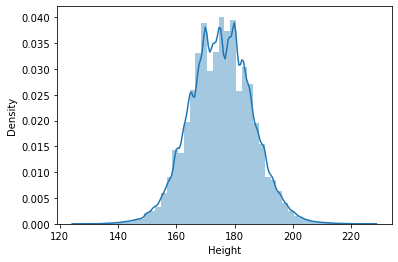

In [8]:
sns.distplot(df['Height'])

In [9]:
df['Sex'].value_counts()

M    196594
F     74522
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x230060aceb0>,
 [Text(-0.9121719548668293, -0.7797065632367264, 'Male'),
  Text(0.9121720278682222, 0.7797064778330213, 'Female')],
 [Text(-0.5321003070056504, -0.454828828554757, '73%'),
  Text(0.5321003495897962, 0.4548287787359291, '27%')])

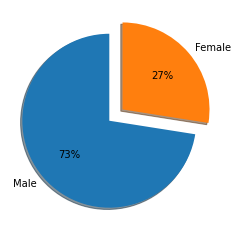

In [25]:
#sns.color_palette(palette = 'ocean')
plt.pie(np.array(df['Sex'].value_counts()), labels = np.array(['Male','Female']), startangle = 90, autopct='%1.0f%%', shadow = True, explode = (0.1, 0.1))

([<matplotlib.patches.Wedge at 0x230060e6430>,
 [Text(-0.23840088100023907, 1.0738552136756192, 'CHN'),
  Text(-0.6071976270378324, 0.9172300920268728, 'DEN'),
  Text(-0.8440237400453368, 0.7054246424954844, 'NED'),
  Text(-0.9998598106806841, 0.4585633641990894, 'USA'),
  Text(-1.0798001117720397, 0.20983736230016528, 'FIN'),
  Text(-1.0993358581066703, -0.038218726834773994, 'NOR'),
  Text(-1.067049674489223, -0.26721712552238003, 'ROU'),
  Text(-0.9952947895121916, -0.46838902844738195, 'EST'),
  Text(-0.8920655224874913, -0.6435985577898069, 'FRA'),
  Text(-0.7741858040047664, -0.78143223690701, 'MAR'),
  Text(-0.6500628165565525, -0.8873659529926545, 'ESP'),
  Text(-0.5167833519443957, -0.9710483855880276, 'EGY'),
  Text(-0.3773358914038857, -1.0332558371760767, 'IRI'),
  Text(-0.23640956059413235, -1.074295359600743, 'BUL'),
  Text(-0.09599832000433012, -1.095803049163647, 'ITA'),
  Text(0.04127586184356487, -1.0992253195906065, 'CHA'),
  Text(0.1738301213956311, -1.0861782031027

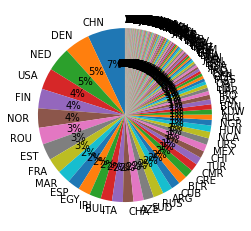

In [27]:
plt.pie(np.array(df['NOC'].value_counts()), labels = df['NOC'].unique(), startangle = 90, autopct='%1.0f%%')

In [ ]:
## Top 10/15 NOC category. 
## Sub group this and try to reduce the count of category .

<AxesSubplot:ylabel='NOC'>

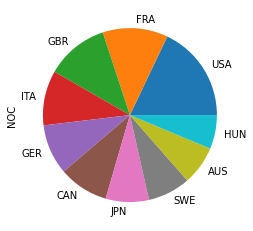

In [30]:
df['NOC'].value_counts().head(10).plot(kind= 'pie')

In [32]:
### Medals 

df['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

###### Action points 

* Create a new datset where only medal = gold. 

1. Which country is getting more gold ?
2. Which athlete has won more golds ?
3. Which country has no gold ?
    a. Which game ?
4. where is the maximum distribution for age for gold medals ?
5. Gender wise gold medal split ? --- Need to check for cross gender competitions. 
6. Season wise gold medal split ?
7. Which atheletes have won maybe more than x golds ?
8. Every sport has male and female competitions ?
9. Which year maximum golds ?
10. Which competitions have max shared medals ?
11. Which year host country won max gold medal ?
12. Atheletes gold streak ? Consecutive years ?
13. 


### Section5 - Bivariate Analysis

1. Categorical to categorical - Gender with Medal (frequency) -- Crosstab/ heatmap, groupby based on 2 columns and then take value count - countplot, sunburst (advanced Pie chart) 
2. Categorical to Numerical
3. Numerical to Numerical - Scatterplot, line (subjective), relplot, lmplopt

In [36]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

`5 questions per category`

   * Categorical to categorical 
        1. Sex with sport. 
        2. Sports with country. 
        3. Medals with country
        4. Gender with country
        5. Season with Gender
        
   * Categorical to Numerical
       1. Country wise height/weight ?
       2. Sport wise height/wieight ?
       3. Sports with Age ? --- 
       4. Sex with height / weight ?
       5. Medals with Age / height / weight ? -- multi per sport ?
   
   * Numerical to Numerical 
       1. Age with height / weight ?
       2. height / weight ?
   
   * Multi Dimension (hue / col) 
       1. Event, country & medals 
       2. Youngest and eldest to bring medals for respective countries. 
       3. Sports into team sports or individual then medal tally ?
       4. City , sports with gender medal split ?
       5. Years, sports, gender, medal. Which year female participation increased ?
       6. Which city/country with participant count and medal tally ?
       7. Year, sports and shared medals tally ?
       8. Winter olympics Vs Summer olympics ? -- This will open atleast 5 more ques. 
       9. Season/sport type and which country will see more medals ?
       10. Home Vs Away medal tally ? -- Open 5 more questions. 
       11. Which opponents are more frequent for medal battle ?
       12. Sports and participation trend from 1st to current olympics ?
       13. Staple food (engineered column) with atheletes performance (medal tally) ?
       14. Height/weight with sport and medal ? (More weight resulting in gold for wrestling ?) 
       15. A/B tetsing -> One specif country comparison -> 
       16. Continent wise medal tally comparison. 
       17. Participant with multi events and their medal trend year wise ?
       18. Relay races -> maybe remove this and check for individual events. 
       19. Participants team wise vs individual performance (medal taly) per sport// ?
       20. Country wise national sport, that performance and year wise trend ? Which sport elsewise ?
       